In [ ]:
!pip install torch torchvision
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15594, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 15594 (delta 95), reused 117 (delta 56), pack-reused 15393
Receiving objects: 100% (15594/15594), 14.63 MiB | 11.66 MiB/s, done.
Resolving deltas: 100% (10619/10619), done.


In [ ]:
import sys
sys.path.append("yolov5")

In [ ]:
import torch
import cv2
from IPython.display import clear_output
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

# Load the pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

def detect_objects(image_path):
    # Read image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform object detection
    results = model(img)

    # Render the image with bounding boxes
    results_img = results.render()
    results_img = cv2.cvtColor(np.array(results_img), cv2.COLOR_BGR2RGB)

    # Display the original image and the image with bounding boxes side by side
    original_img = Image.fromarray(img)
    result_img = Image.fromarray(results_img)
    
    display(original_img)
    display(result_img)

    # Print the detected objects with their classes, confidence scores, and bounding box coordinates
    for result in results.xyxy[0].tolist():
        class_id = int(result[5])
        confidence = result[4]
        class_name = model.names[class_id]
        x1, y1, x2, y2 = result[:4]
        print(f"Class: {class_name}, Confidence: {confidence:.2f}, Bounding Box: ({x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f})")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-24 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


100%|██████████| 14.1M/14.1M [00:00<00:00, 195MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


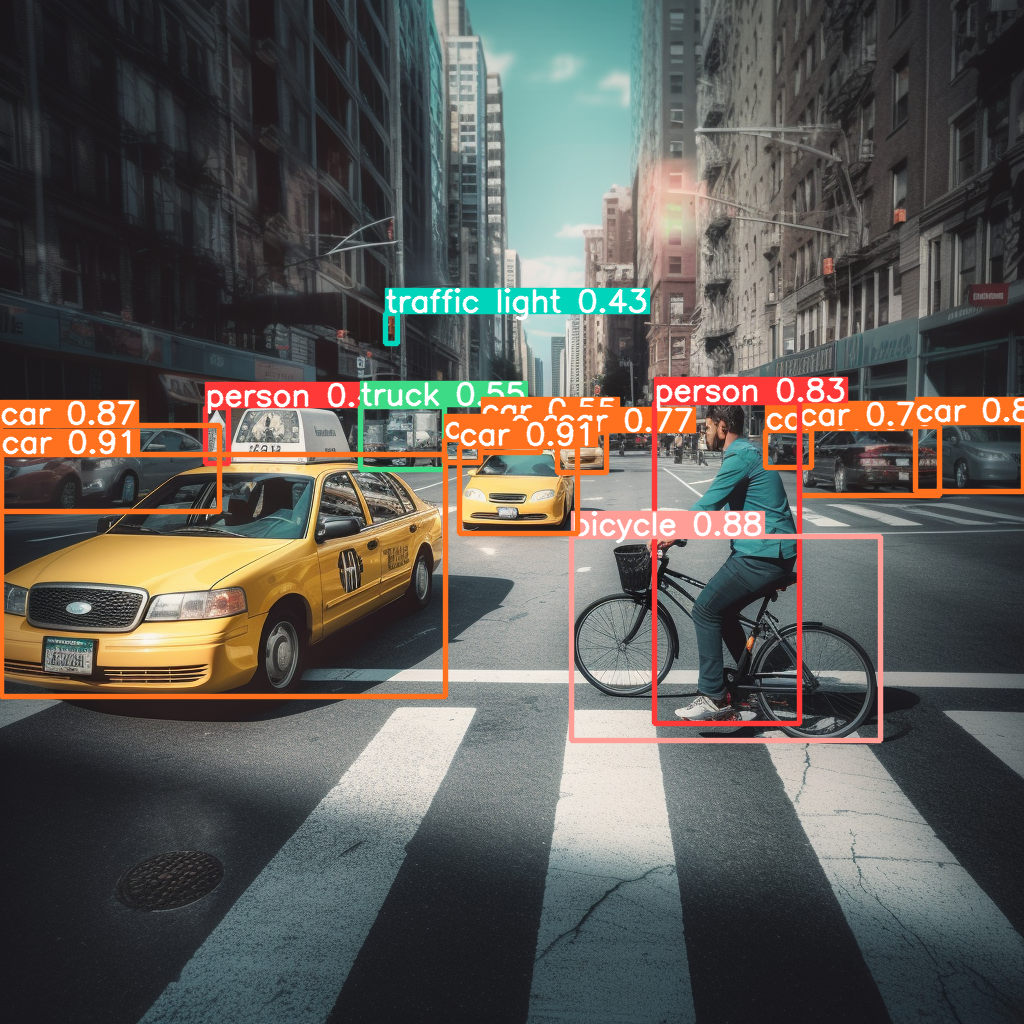

Class: car, Confidence: 0.91, Bounding Box: (459, 447, 578, 533)
Class: car, Confidence: 0.91, Bounding Box: (2, 454, 445, 696)
Class: car, Confidence: 0.88, Bounding Box: (915, 423, 1023, 491)
Class: bicycle, Confidence: 0.88, Bounding Box: (572, 537, 880, 740)
Class: car, Confidence: 0.87, Bounding Box: (0, 425, 220, 512)
Class: person, Confidence: 0.83, Bounding Box: (655, 402, 799, 723)
Class: car, Confidence: 0.79, Bounding Box: (799, 426, 940, 495)
Class: car, Confidence: 0.77, Bounding Box: (558, 433, 606, 472)
Class: car, Confidence: 0.60, Bounding Box: (444, 439, 480, 462)
Class: car, Confidence: 0.55, Bounding Box: (481, 423, 541, 452)
Class: truck, Confidence: 0.55, Bounding Box: (360, 406, 445, 469)
Class: person, Confidence: 0.49, Bounding Box: (206, 407, 228, 464)
Class: traffic light, Confidence: 0.43, Bounding Box: (385, 313, 398, 344)
Class: car, Confidence: 0.43, Bounding Box: (765, 431, 811, 467)


In [ ]:
image_path = "/content/car.png"
detect_objects(image_path)